<a href="https://colab.research.google.com/github/Hafsa620/PAI/blob/main/chapter_3_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

In [ ]:
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get the dataset and preprocess it

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
def plot_input_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    #plt.axis('off')
    plt.show()

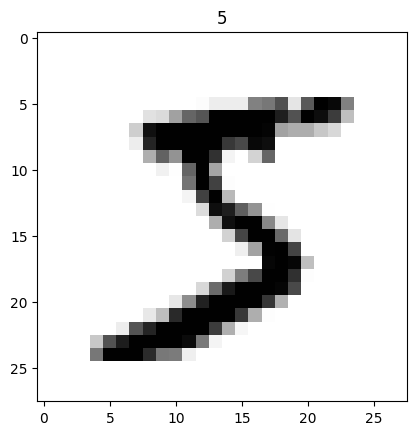

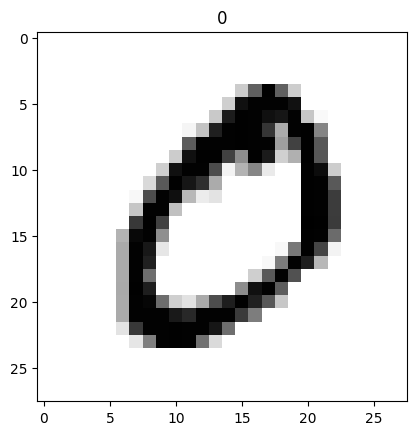

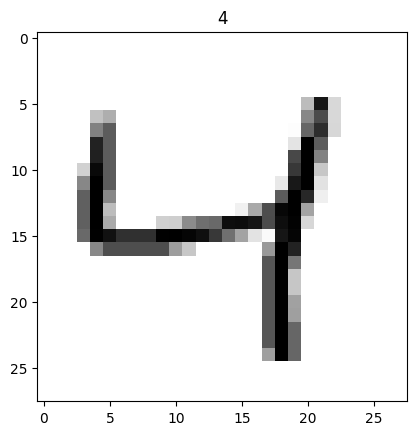

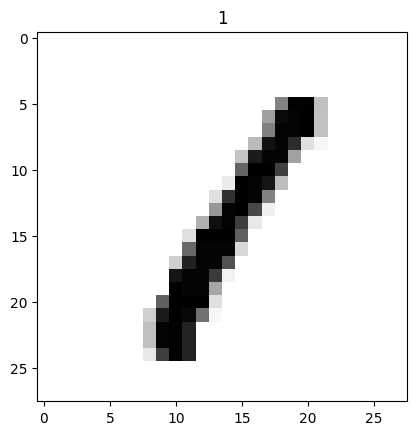

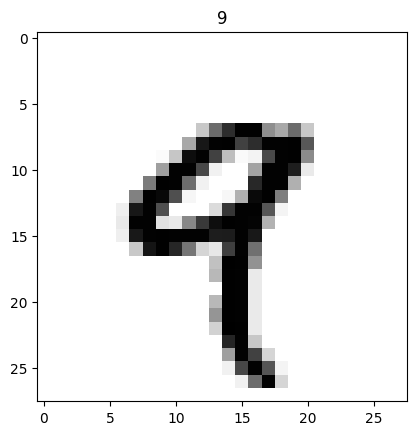

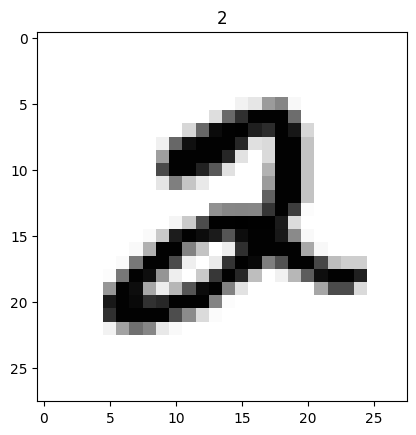

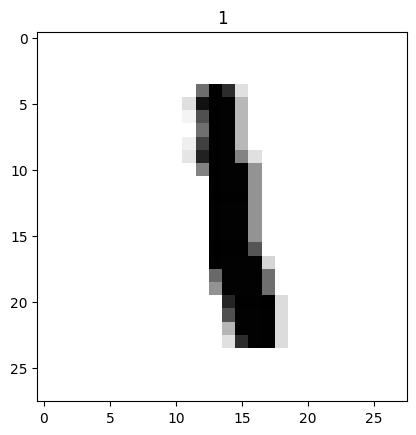

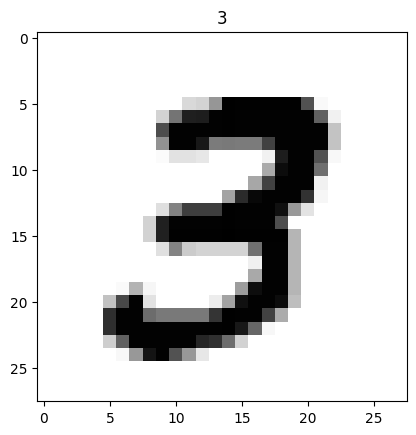

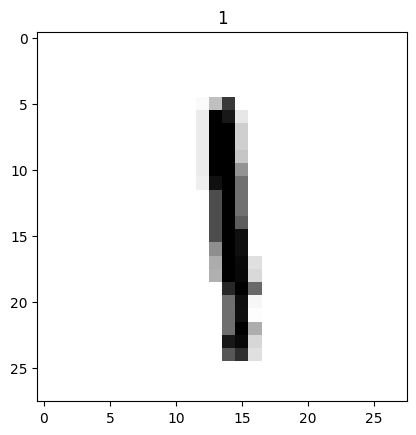

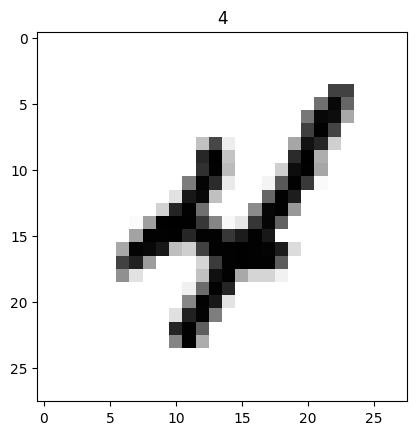

In [ ]:
for i in range(10):
    plot_input_img(i)

In [ ]:
# Preprocess the image i.e normalize in the range of 0-1
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# As X_train and X_test have shape (n_samples, 28, 28), flatten them:
X_train = X_train.reshape((X_train.shape[0], -1))  # -> (60000, 784)
X_test = X_test.reshape((X_test.shape[0], -1))     # -> (10000, 784)

In [ ]:
X_train.shape

(60000, 784)

# OvR vs OvO strategies for multiclass

In [ ]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# OvR strategy
ovr_clf = OneVsRestClassifier(LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42))
ovr_scores = cross_val_score(ovr_clf, X_train, y_train, cv=3, scoring="accuracy")

# OvO strategy
ovo_clf = OneVsOneClassifier(LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42))
ovo_scores = cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

print("OvR accuracy: ", ovr_scores.mean())
print("OvO accuracy: ", ovo_scores.mean())

OvR accuracy:  0.9136000000000001
OvO accuracy:  0.9362666666666666


#SDG Classifier

In [ ]:
# Train classifiers
print("Training SGD classifier...")
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

Training SGD classifier...


SGDClassifier(random_state=42)

In [ ]:
import joblib

# Save the trained model
joblib.dump(sgd_clf, "sgd_mnist_model.joblib")

['sgd_mnist_model.joblib']

# Random Forest Classifier

In [ ]:
print("Training Random Forest classifier...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

Training Random Forest classifier...


RandomForestClassifier(random_state=42)

In [ ]:
# Save the trained model
joblib.dump(rf_clf, "rf_mnist_model.joblib")

['rf_mnist_model.joblib']

In [ ]:
# Evaluation
sgd_preds = sgd_clf.predict(X_test)
rf_preds = rf_clf.predict(X_test)

In [ ]:
print("\nSGD Classifier Report:")
print(classification_report(y_test, sgd_preds))

print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, rf_preds))


SGD Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.91      0.91      0.91      1032
           3       0.92      0.89      0.91      1010
           4       0.90      0.94      0.92       982
           5       0.89      0.87      0.88       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.85      0.87       974
           9       0.91      0.88      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0

# Visualize worst misclassifications of Random Forest

Visualizing worst misclassifications (Random Forest)...


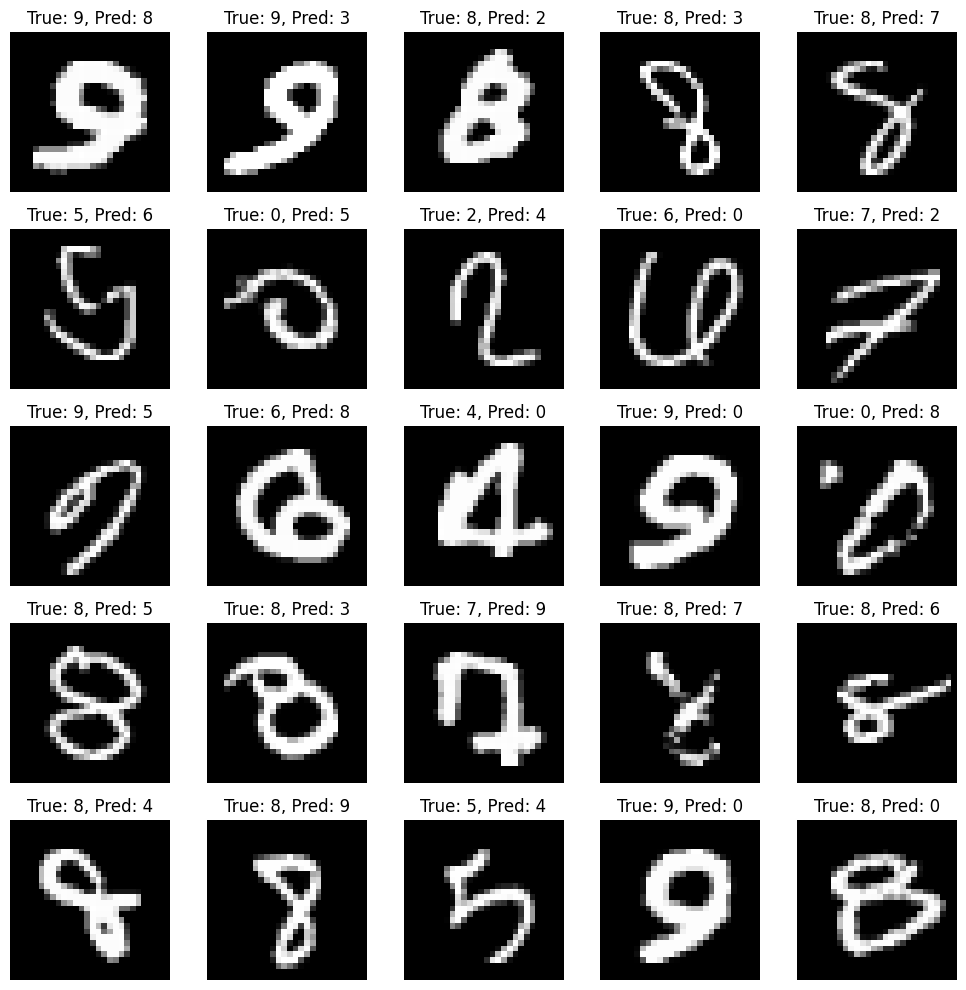

In [ ]:
# Visualize worst misclassifications
print("Visualizing worst misclassifications (Random Forest)...")
misclassified = np.where(rf_preds != y_test)[0]
errors = [(i, rf_clf.predict_proba([X_test[i]])[0][rf_preds[i]]) for i in misclassified]
errors.sort(key=lambda x: x[1], reverse=False)  # Least confidence first

plt.figure(figsize=(10, 10))
for i, (idx, _) in enumerate(errors[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {rf_preds[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Error analysis of SDG

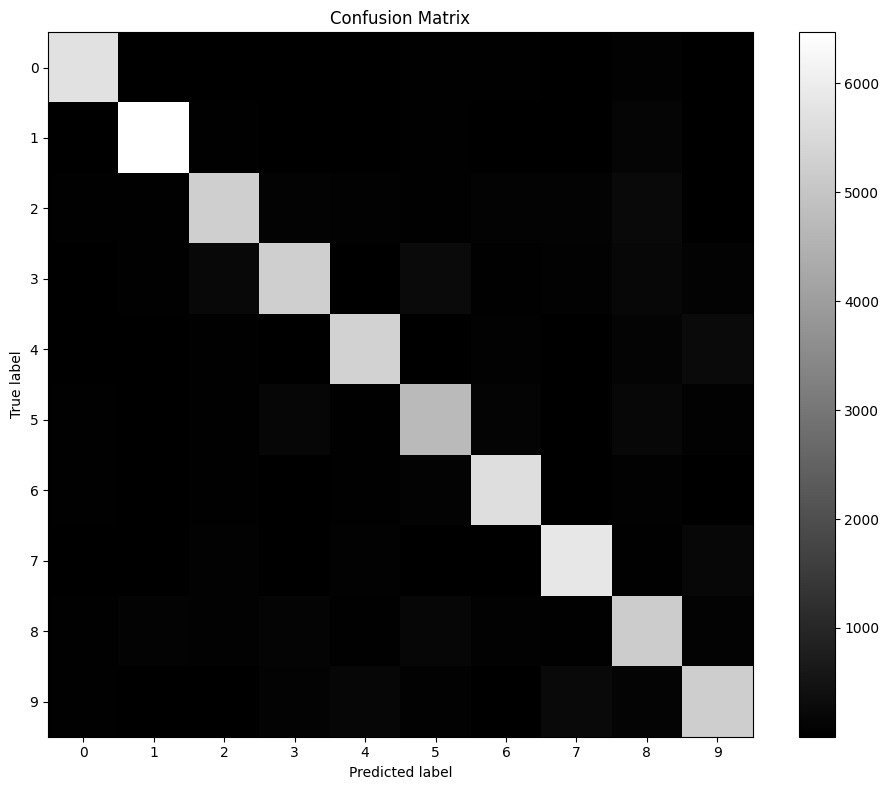

In [ ]:
from sklearn.model_selection import cross_val_predict

# Run cross-validation predictions (on training data only)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

# Confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix as image
plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
# Use imshow instead of matshow and add interpolation for smoother display
plt.imshow(conf_mx, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar() # Add a color bar to interpret the values

# Add ticks and labels for each class
tick_marks = np.arange(len(np.unique(y_train)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

<Figure size 800x600 with 0 Axes>

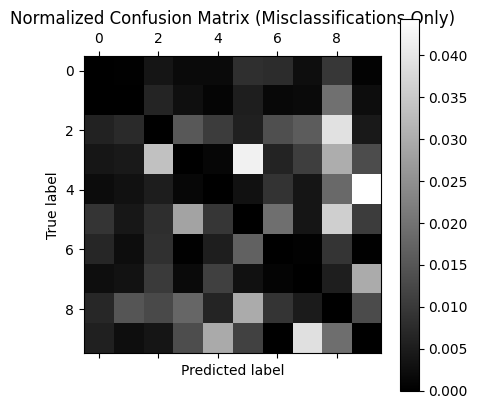

In [ ]:
# Normalize to get error rates instead of raw counts
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill the diagonal with zeros to show only misclassifications
np.fill_diagonal(norm_conf_mx, 0)

# Plot normalized confusion matrix (errors only)
plt.figure(figsize=(8, 6))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Normalized Confusion Matrix (Misclassifications Only)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.show()


Three Common Error Patterns
By visually inspecting the brighter off-diagonal cells (indicating higher misclassification frequencies), the three most prominent misclassification patterns are:

Misclassifications:
9 → 4, 4 → 9, 5 → 3
Meanings:
Class 9 is often predicted as 4
Class 4 is misclassified as 9
Class 5 predicted as 3
Reasons:
Similar loop-like structure
4’s tail and loop may resemble a 9
Similar curves, especially if stroke is sloppy

# Proposed Solutions
Problem and suggestions:
- 9 ↔ 4
Confusion	Data Augmentation: Apply rotation, scaling, or elastic distortions to enhance variety.
- 5 → 3
Error	Preprocessing: Apply better noise removal and edge-enhancement (e.g., Canny filter).
General Confusion	Model Upgrade: Try CNNs with attention or use a pretrained backbone like ResNet.

# Random forest error analysis

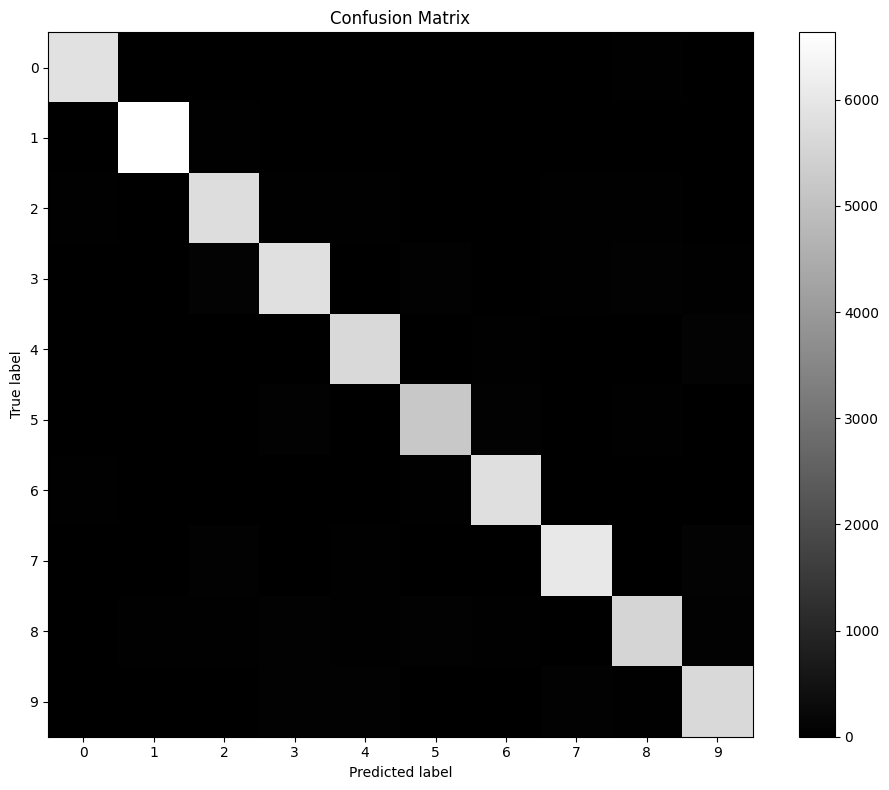

In [ ]:
# Run cross-validation predictions (on training data only)
y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)

# Confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix as image
plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
# Use imshow instead of matshow and add interpolation for smoother display
plt.imshow(conf_mx, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar() # Add a color bar to interpret the values

# Add ticks and labels for each class
tick_marks = np.arange(len(np.unique(y_train)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

<Figure size 800x600 with 0 Axes>

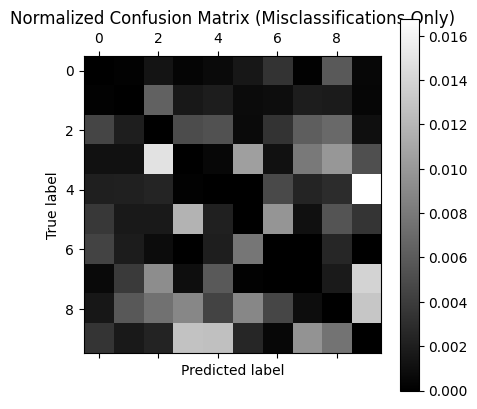

In [ ]:
# Normalize to get error rates instead of raw counts
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill the diagonal with zeros to show only misclassifications
np.fill_diagonal(norm_conf_mx, 0)

# Plot normalized confusion matrix (errors only)
plt.figure(figsize=(8, 6))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Normalized Confusion Matrix (Misclassifications Only)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.show()

# Error Analysis Report

Identify 3 Common Error Patterns

9 → 4	Looped top of 9 looks like 4's angle
5 → 3	Similar curves, especially when 5 is sloppy
8 → 0 or 3	If one of the loops is faint, looks like a 0 or 3

# Propose Solutions
Problem
9 → 4
Fix: Add rotated/augmented 9s, Helps model learn loop shapes
5 → 3
Fix: Sharpen edges / denoise, Makes curves more distinct
8 → 0 / 3
Fix: Enhance contrast, 	Brings out both loops clearly

Also:

Use histogram equalization to enhance image contrast

Try data augmentation: rotation, slight scaling, noise injection

For better results, switch to a CNN in the future


# Implement One Improvement: Preprocessing

In [ ]:
import cv2

def preprocess_eq(img_array_flat):
    # Reshape, equalize, and flatten again
    img = img_array_flat.reshape(28, 28).astype(np.uint8)
    eq_img = cv2.equalizeHist(img)
    return eq_img.flatten().astype(np.float32) / 255.0
X_test_eq = np.array([preprocess_eq(x) for x in X_test])

# Before preprocessing
acc_before = accuracy_score(y_test, rf_preds)

# After preprocessing
rf_preds_eq = rf_clf.predict(X_test_eq)
acc_after = accuracy_score(y_test, rf_preds_eq)

print(f"Accuracy before equalization: {acc_before:.4f}")
print(f"Accuracy after equalization : {acc_after:.4f}")

Accuracy before equalization: 0.9704
Accuracy after equalization : 0.1600


In [ ]:
# Preprocess training data
X_train_eq = np.array([preprocess_eq(x) for x in X_train])

# Retrain model
rf_clf_eq = RandomForestClassifier().fit(X_train_eq, y_train)

# Now test on equalized test set
X_test_eq = np.array([preprocess_eq(x) for x in X_test])
rf_preds_eq = rf_clf_eq.predict(X_test_eq)

# Accuracy
from sklearn.metrics import accuracy_score
print("Equalized Model Accuracy:", accuracy_score(y_test, rf_preds_eq))

Equalized Model Accuracy: 0.4204


This solution leads to low accuracy so we move to another better solution (CNN) to check accuracy is improved or not.

#  Implement One Improvement
Let’s implement Data Augmentation to address 9↔4 confusion and retrain a simple CNN using MNIST (or your dataset).

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.7674 - loss: 0.7194 - val_accuracy: 0.9829 - val_loss: 0.0527
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9545 - loss: 0.1496 - val_accuracy: 0.9884 - val_loss: 0.0321
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9671 - loss: 0.1057 - val_accuracy: 0.9893 - val_loss: 0.0334
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9737 - loss: 0.0851 - val_accuracy: 0.9915 - val_loss: 0.0266
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9767 - loss: 0.0738 - val_accuracy: 0.9924 - val_loss: 0.0235


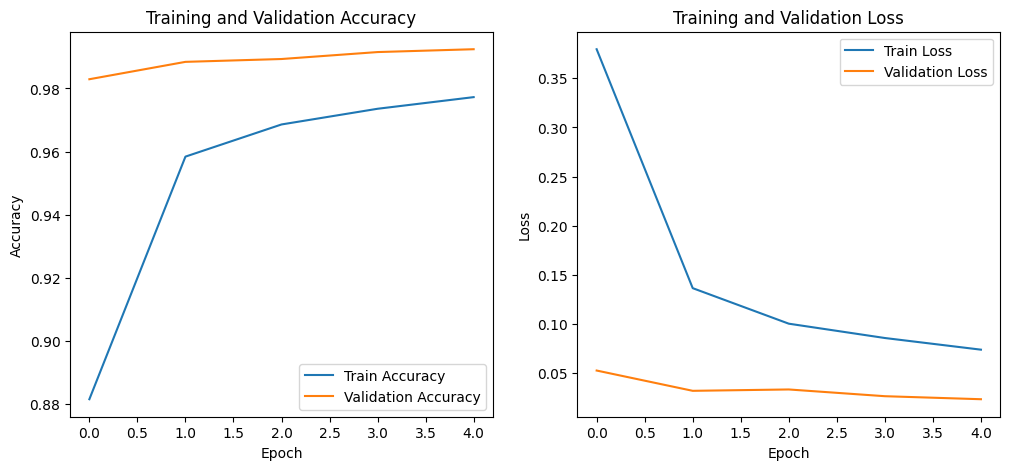

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


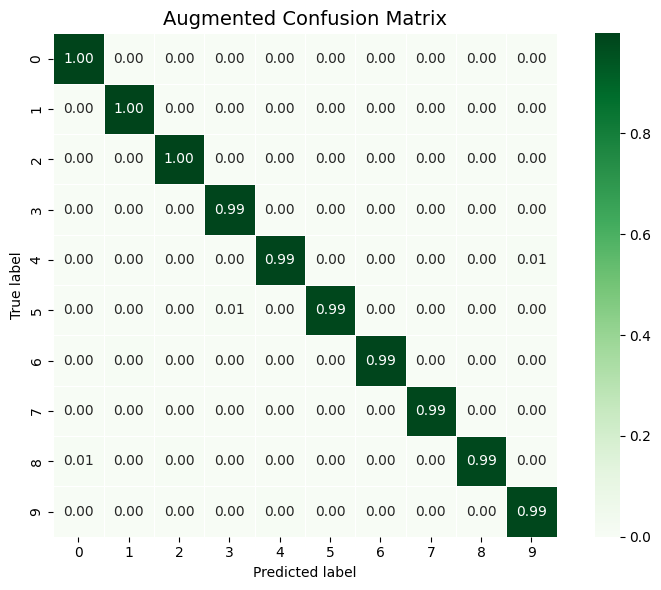

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#  Build Model
def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#  Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# Train
model_aug = build_model()

history_aug = model_aug.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=5,
    validation_data=(X_test, y_test_cat)
)


def plot_training_validation_curves(history):
    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_validation_curves(history_aug)



# Predict
y_pred_aug = model_aug.predict(X_test).argmax(axis=1)

# Confusion Matrix
cm_aug = confusion_matrix(y_test, y_pred_aug, normalize='true')

# Plot
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap='Greens'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap=cmap, cbar=True,
                annot_kws={"size": 10}, linewidths=0.5, square=True)
    plt.title(title, fontsize=14)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm_aug, title="Augmented Confusion Matrix")


In [ ]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_aug)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
report = classification_report(y_test, y_pred_aug, digits=4)
print("Classification Report:\n", report)


Test Accuracy: 0.9924
Classification Report:
               precision    recall  f1-score   support

           0     0.9879    0.9980    0.9929       980
           1     0.9930    0.9982    0.9956      1135
           2     0.9904    0.9961    0.9932      1032
           3     0.9931    0.9921    0.9926      1010
           4     0.9919    0.9939    0.9929       982
           5     0.9933    0.9899    0.9916       892
           6     0.9958    0.9916    0.9937       958
           7     0.9932    0.9883    0.9907      1028
           8     0.9948    0.9856    0.9902       974
           9     0.9911    0.9891    0.9901      1009

    accuracy                         0.9924     10000
   macro avg     0.9924    0.9923    0.9924     10000
weighted avg     0.9924    0.9924    0.9924     10000



Findings: This solution increase accuracy as compared to previous models

In [ ]:
# Save the model to a file (HDF5 format)
model_aug.save("mnist_augmented_cnn_model.h5")
